In [2]:
EPOCHS: int = 15
BATCH_SIZE: int = 128
TEST_SIZE: float = 0.1
TEST_BATCH_SIZE: int = 64
RANDOM_STATE: int = 42
IMAGE_SHAPE: tuple = (28, 28, 1)

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=TEST_SIZE,random_state=RANDOM_STATE)
x_test_copy = np.array(x_test, copy=True)  

In [6]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('__'*5 ,'Shapes of Data', '__'*5,'\n')

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}', '\n')

print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}', '\n')

print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}', '\n')

print('__'*5,'Samples','__'*5, '\n')

print(f'train samples: {x_train.shape[0]}')
print(f'validation samples: {x_val.shape[0]}')
print(f'test samples: {x_test.shape[0]}', '\n')

__________ Shapes of Data __________ 

x_train shape: (54000, 28, 28, 1)
y_train shape: (54000, 10) 

x_val shape: (6000, 28, 28, 1)
y_val shape: (6000, 10) 

x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10) 

__________ Samples __________ 

train samples: 54000
validation samples: 6000
test samples: 10000 



In [19]:
from tensorflow.keras import Input, Sequential, layers

print('__'*15,'Building the CNN model', '__'*15,'\n')
model = Sequential([
                    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=IMAGE_SHAPE),
                    layers.Conv2D(64, (3, 3), activation='relu'),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dropout(0.5),
                    layers.Dense(10, activation='softmax')
])

model.summary()

______________________________ Building the CNN model ______________________________ 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (Non

In [20]:
from tensorflow.keras.optimizers import Adam

adam = Adam()
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])

print('__'*15,'|== Training the model ==|','__'*15, '\n')
history = model.fit(x_train, y_train,validation_data=(x_val, y_val), epochs=EPOCHS,batch_size=BATCH_SIZE)

______________________________ |== Training the model ==| ______________________________ 

Epoch 1/15
422/422 [==============================] - 45s 92ms/step - loss: 0.2506 - accuracy: 0.9224 - val_loss: 0.0596 - val_accuracy: 0.9835
Epoch 2/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0883 - accuracy: 0.9736 - val_loss: 0.0486 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 52s 123ms/step - loss: 0.0653 - accuracy: 0.9805 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 4/15
422/422 [==============================] - 49s 117ms/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0354 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 51s 120ms/step - loss: 0.0443 - accuracy: 0.9866 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0309 - val_accuracy: 0.9918
Epoch 7/15
422/422 [====================

In [21]:
from sklearn.metrics import classification_report

print('__'*15,'Evaluating the model', '__'*15,'\n')

target_names = [str(label) for label in range(10)]
predictions = model.predict(x_test, batch_size=TEST_BATCH_SIZE)
report = classification_report(y_test.argmax(axis=1),
                               predictions.argmax(axis=1),
                               target_names=target_names)
print(report, '\n')

scores = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {:.4f}".format(scores[1]))

______________________________ Evaluating the model ______________________________ 

157/157 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 

Test accuracy: 0.9912


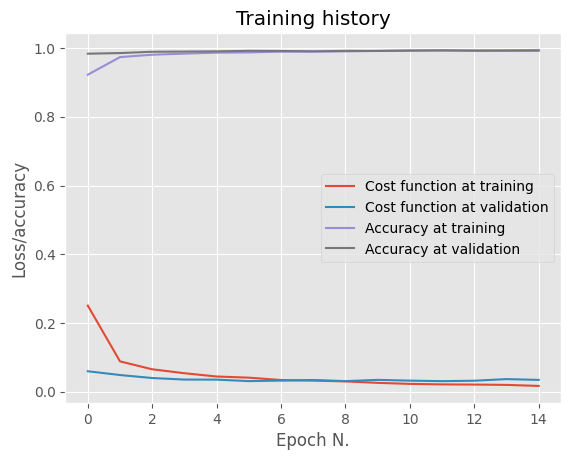

In [26]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure()

epoch_values = list(range(EPOCHS))
plt.plot(epoch_values, history.history['loss'], label='Cost function at training')
plt.plot(epoch_values, history.history['val_loss'], label='Cost function at validation')
plt.plot(epoch_values, history.history['accuracy'], label='Accuracy at training')
plt.plot(epoch_values, history.history['val_accuracy'], label='Accuracy at validation')

plt.title('Training history')
plt.xlabel('Epoch N.')
plt.ylabel('Loss/accuracy')
plt.legend()

In [ ]:
%pip install tensorflowjs

In [35]:
%rm keras.h5
model.save('keras.h5')

In [ ]:
##%rm -r model
%mkdir model

!tensorflowjs_converter --input_format keras keras.h5 model/

In [ ]:
# Download model
from google.colab import files
!zip -r model.zip model
files.download('model.zip')